# Dragon Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Data.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.543,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284571,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702592,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#housing.hist(bins=50,figsize=(20,15))

## Train Test Splitting

In [10]:
#For learning purposes
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42) #Fix shuffled values, essentially separating test and train values.
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
#train_set, test_set = split_train_test(housing,0.2)

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}") #80:20 ratio

Rows in train set : 404 
Rows in test set : 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['chas']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
#housing = strat_train_set.copy #as it is not callable, we take copy

## Looking For Correlations

In [15]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False) #Petersons Correlation Coefficient

medv       1.000000
rm         0.695370
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

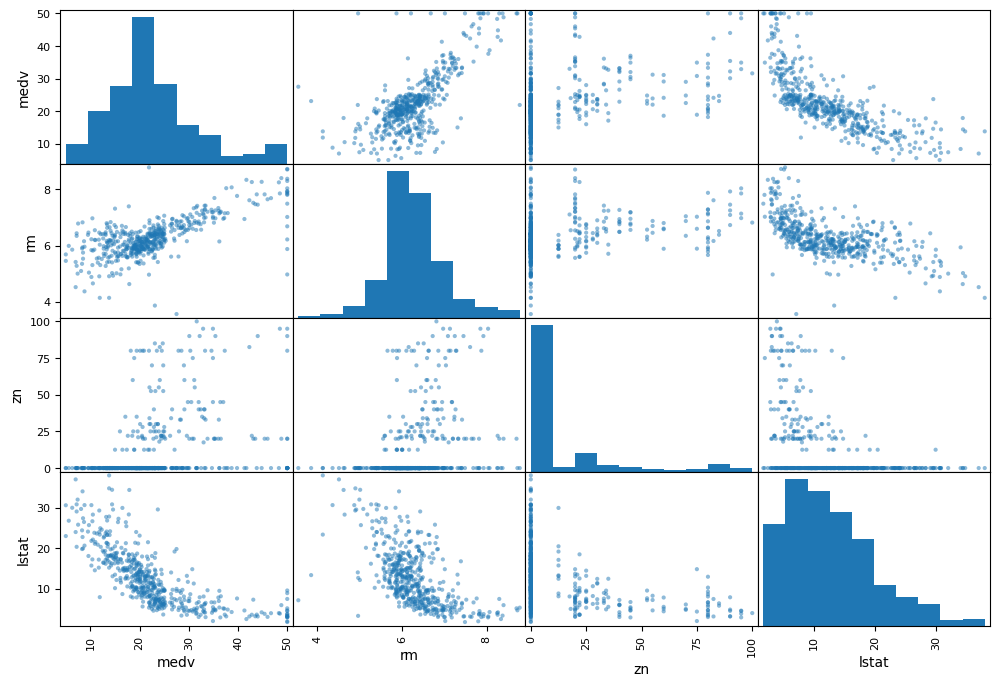

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["medv","rm","zn","lstat"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='rm', ylabel='medv'>

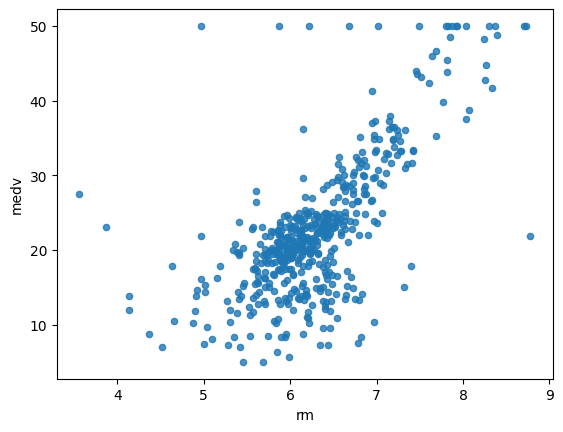

In [17]:
housing.plot(kind="scatter",x="rm",y="medv",alpha=0.8) #capping happening at 50

## Attribute Combination

In [18]:
housing["taxrm"] = housing["tax"]/housing["rm"]
housing["taxrm"]

0      45.239187
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: taxrm, Length: 506, dtype: float64

In [19]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxrm
0,0.00632,18.0,2.31,0,0.538,6.543,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.239187
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [20]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False) #Petersons Correlation Coefficient

medv       1.000000
rm         0.695370
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
taxrm     -0.537653
lstat     -0.737663
Name: medv, dtype: float64

<Axes: xlabel='taxrm', ylabel='medv'>

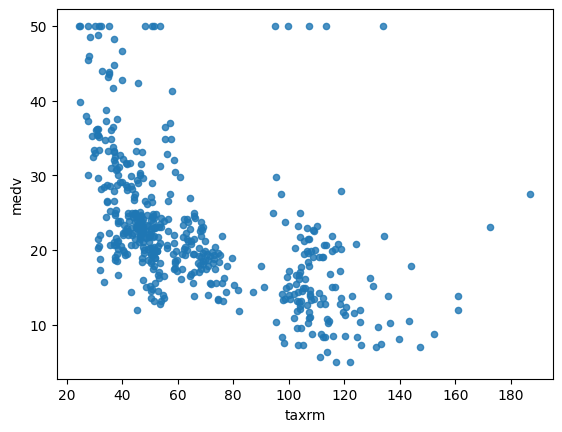

In [21]:
housing.plot(kind="scatter",x="taxrm",y="medv",alpha=0.8) #capping happening at 50

In [22]:
housing = strat_train_set.drop("medv",axis=1)
housing_labels = strat_train_set["medv"].copy()

## Missing Attributes

In [23]:
#To take care of missing attributes, there are 3 options
#1. Get rid of missing data points
#2. Get rid of whole attribute
#3. Set value to some value (0, mean or median)

In [24]:
a = housing.dropna(subset=["rm"]) #Option 1, you get a copy using dropna, stored in a
a.shape

(404, 13)

In [25]:
#housing.drop("rm",axis=1).shape #Option 2, no rm column and og housing dataframe will be unchanged

In [26]:
median = housing["rm"].median() #Option 3
housing["rm"].fillna(median) #Where na is present, fill with median
housing.shape

(404, 13)

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing) #fit housing into imputer

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_ #calculated values of median

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [29]:
X=imputer.transform(housing)

In [30]:
housing_tr=pd.DataFrame(X,columns=housing.columns) #new values are imputed, tr means transformed

In [31]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279829,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712952,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SciKit-learn Design

Primarily, there are 3 types of objects

1. Estimators - estimates some parameter based on dataset Eg. Imputer
It has a fit method (Fits dataset and calc parameters) and transform method.

2. Transformers - transform method takes input and returns output based on learning from fit(). 
Also has convenience function called fit_transform() which fits and then transforms

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. 
It also gives score function which will evaluate the predictions.

## Feature Scaling

Primarily two types of feature scaling :
1. Min-max scaling (Normalization) 
(value-min)/max-min #will lie btw 0&1
sklean provides a class called MinMaxScaler for this

2. Standardization
(value-mean)/std
sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [34]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [36]:
some_data = housing.iloc[:5]

In [37]:
some_labels = housing_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data) #array of predictions

array([22.234, 25.432, 16.577, 23.383, 23.584])

In [40]:
list(some_labels) #to convert array to list

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [42]:
mse #overfitted

1.5337081188118795

## Using better evaluation technique - Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [44]:
rmse_scores #Better than linear regression, best till now

array([2.73687121, 2.59722858, 4.37291935, 2.72814528, 3.48080685,
       2.54904837, 4.35067627, 3.36122272, 3.47708246, 3.19776212])

In [45]:
def print_scores(scores):
    print("Scores are : ",scores)
    print("Mean : ",scores.mean())
    print("STD : ",scores.std())

In [46]:
print_scores(rmse_scores)

Scores are :  [2.73687121 2.59722858 4.37291935 2.72814528 3.48080685 2.54904837
 4.35067627 3.36122272 3.47708246 3.19776212]
Mean :  3.285176321808332
STD :  0.6350651249939074


## Saving the Model

In [47]:
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model on test data

In [48]:
X_test = strat_test_set.drop("medv",axis=1)
Y_test = strat_test_set["medv"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print (final_predictions, list(Y_test))

[24.173 11.263 25.298 21.891 18.484 14.806 19.772 14.749 30.755 41.857
 19.364 11.77  23.759 23.798 19.635 10.858 31.203 14.233 23.637 18.529
 19.438 18.285 16.711 22.386 18.254 31.742 15.986 33.155  8.952 33.746
 23.893 21.467 23.165 10.525 20.528 11.439 43.897 24.236 23.38  42.496
 24.01  29.338 20.129 20.579 19.474 33.382 44.496 20.033 19.913 21.467
 21.567 14.235 21.014 15.238 24.991 33.436 43.172 30.081 19.532 20.803
 46.713 10.03  19.487 25.019 14.962 33.275 19.191 17.629 19.058 33.98
 26.352 22.882 21.059 22.875 35.063 13.234 15.613 20.066 20.412 21.544
 22.326 20.85  13.97  22.876 20.681 21.198 14.651 21.452 21.79  23.345
 18.65  27.411  7.208 25.861 18.418 29.593 20.201 31.417 14.536 26.402
 21.702 20.094] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [49]:
final_rmse

2.9605603685921404

In [50]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2413097 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [51]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2413097 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.234])